<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/WorkingHour2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
from sklearn import metrics

In [ ]:
df = pd.read_csv(path)
working_hour_index = set()

In [ ]:
for i in range(0,24*60//5):
  hour = int(df.loc[i]["time"][11:13])

  if (9 <= hour <= 17):
    working_hour_index.add(i)

In [ ]:
all_index = list()
for i in range(1,366):
  for j in working_hour_index:
    all_index.append(i*j)
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)
df_corr = df2.corr()
arr = df_corr.copy()
arr

,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,drive/MyDrive/2017_v1/821_1_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.421214,0.248288,0.349638,0.576386,0.263268,0.104942,0.334351,0.251853,0.407058,0.312770,0.492331,0.572243,0.213575,0.422945,0.768130,0.328278,0.149913,0.176279,0.598589,0.485507,0.309744,0.108134,0.516384,0.455081,0.227851,0.660894,0.545947,0.522051,0.570046,0.140274,0.085181,0.286707,0.363359,0.413541,-0.044402,0.506225,0.365215,0.368951,-0.228541,...,0.297809,0.224090,0.366064,0.307258,0.331152,0.683509,0.315029,-0.249174,0.352583,0.468450,0.337245,0.442374,0.172770,0.341936,0.200008,-0.005622,0.415344,0.334598,0.132440,0.242499,0.586396,0.377120,-0.063907,0.643534,0.014860,0.622644,0.293240,0.101746,0.660047,0.227146,0.330777,0.203604,0.389544,0.345086,0.585942,0.591576,0.217797,0.271889,0.206095,0.168475
drive/MyDrive/2017_v1/482_1_2017.csv,0.421214,1.000000,0.439960,0.515520,0.569916,0.470160,0.249930,0.547975,0.445663,0.665962,0.544874,0.342326,0.736334,0.297189,0.580720,0.336433,0.559665,0.333401,0.391767,0.384098,0.622518,0.473261,0.199644,0.722341,0.3

In [ ]:
cols = list(arr.columns)
corr = np.array(arr)
corr

array([[1.        , 0.42121434, 0.24828837, ..., 0.27188875, 0.20609494,
        0.16847547],
       [0.42121434, 1.        , 0.43995997, ..., 0.37927069, 0.17924396,
        0.35568092],
       [0.24828837, 0.43995997, 1.        , ..., 0.56953003, 0.24073915,
        0.54762531],
       ...,
       [0.27188875, 0.37927069, 0.56953003, ..., 1.        , 0.2065122 ,
        0.44902698],
       [0.20609494, 0.17924396, 0.24073915, ..., 0.2065122 , 1.        ,
        0.18765366],
       [0.16847547, 0.35568092, 0.54762531, ..., 0.44902698, 0.18765366,
        1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

4

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.1954604050443381

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.20884837715119683

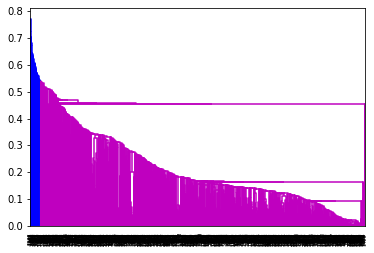

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1463
cluster:4 len:1
cluster:3 len:1
cluster:2 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

72

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.030527733897410262

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.031761759518337776

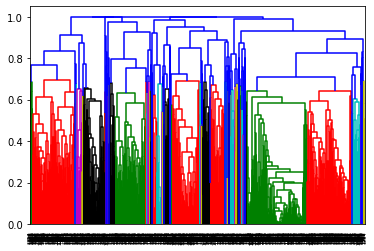

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:17 len:138
cluster:5 len:26
cluster:64 len:270
cluster:2 len:186
cluster:35 len:119
cluster:29 len:26
cluster:65 len:195
cluster:63 len:1
cluster:66 len:38
cluster:6 len:5
cluster:25 len:19
cluster:7 len:92
cluster:54 len:10
cluster:41 len:66
cluster:59 len:2
cluster:39 len:29
cluster:26 len:24
cluster:70 len:10
cluster:19 len:7
cluster:21 len:5
cluster:50 len:19
cluster:1 len:11
cluster:14 len:3
cluster:16 len:21
cluster:12 len:1
cluster:23 len:2
cluster:42 len:8
cluster:18 len:5
cluster:49 len:3
cluster:22 len:3
cluster:20 len:7
cluster:52 len:11
cluster:57 len:7
cluster:36 len:7
cluster:9 len:6
cluster:68 len:5
cluster:28 len:3
cluster:37 len:2
cluster:60 len:1
cluster:53 len:2
cluster:10 len:2
cluster:34 len:10
cluster:45 len:2
cluster:62 len:3
cluster:30 len:1
cluster:3 len:5
cluster:44 len:4
cluster:67 len:1
cluster:47 len:1
cluster:56 len:2
cluster:38 len:5
cluster:40 len:2
cluster:46 len:4
cluster:11 len:1
cluster:58 len:2
cluster:71 len:1
cluster:27 len:2
cluster:8 len

In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

43

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

-0.0204075349210778

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

-0.020016024312386613

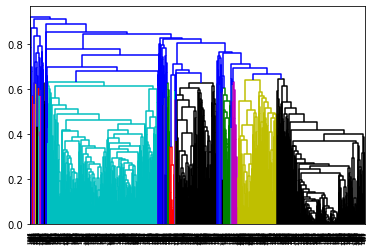

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:32 len:183
cluster:13 len:488
cluster:40 len:581
cluster:27 len:1
cluster:30 len:17
cluster:26 len:7
cluster:38 len:39
cluster:31 len:25
cluster:9 len:14
cluster:7 len:11
cluster:19 len:4
cluster:11 len:1
cluster:1 len:14
cluster:35 len:8
cluster:5 len:9
cluster:24 len:3
cluster:6 len:4
cluster:14 len:1
cluster:4 len:8
cluster:39 len:6
cluster:22 len:1
cluster:28 len:2
cluster:8 len:2
cluster:36 len:4
cluster:25 len:4
cluster:37 len:1
cluster:17 len:1
cluster:34 len:1
cluster:33 len:7
cluster:10 len:1
cluster:12 len:4
cluster:15 len:1
cluster:3 len:2
cluster:29 len:2
cluster:23 len:1
cluster:2 len:1
cluster:43 len:1
cluster:41 len:1
cluster:21 len:1
cluster:42 len:1
cluster:16 len:1
cluster:18 len:1
cluster:20 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

8

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.1627640826281327

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.17756513998146953

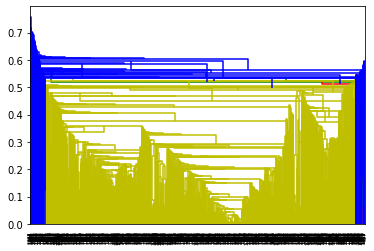

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1459
cluster:7 len:1
cluster:5 len:1
cluster:8 len:1
cluster:6 len:1
cluster:2 len:1
cluster:4 len:1
cluster:3 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

32

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.1539588583102246

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.1616620784065242

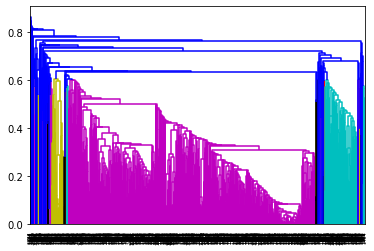

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:14 len:1198
cluster:18 len:173
cluster:19 len:1
cluster:6 len:17
cluster:5 len:11
cluster:26 len:1
cluster:24 len:14
cluster:23 len:3
cluster:22 len:4
cluster:8 len:1
cluster:11 len:6
cluster:3 len:1
cluster:2 len:2
cluster:17 len:4
cluster:13 len:2
cluster:10 len:5
cluster:15 len:1
cluster:30 len:1
cluster:16 len:6
cluster:7 len:1
cluster:9 len:1
cluster:1 len:2
cluster:4 len:1
cluster:12 len:2
cluster:21 len:1
cluster:32 len:1
cluster:31 len:1
cluster:28 len:1
cluster:29 len:1
cluster:27 len:1
cluster:20 len:1
cluster:25 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/WorkingHourAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()